# Analyzing results of one experiment.
### Finding std of std and mean
### plotting the predictions
### plotting kde
### KS test

### traffic-nips has 

963 train series

6741 test series = 7 * 963

the prediction length is 24 

## imports

In [1]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt


In [2]:
from scr.RQ1_forecast import *

In [3]:
num_samples = 100

In [4]:
data_address1 = '/home/dev/deepts/experiments/n_beats/electricity/1B'

# Forecast section

## Load data

In [5]:
# read the forcast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1)

101it [00:00, 27971.26it/s]
100%|###########| 100/100 [05:58<00:00,  3.59s/it]


In [6]:
len(forcast_list1)

100

In [7]:
forcast_list1[0]

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
0,1,0,2014-05-26 20:00:00,9.0,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,...,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975
1,1,0,2014-05-26 21:00:00,10.0,2.294023,2.294023,2.294023,2.294023,2.294023,2.294023,...,2.294023,2.294023,2.294023,2.294023,2.294023,2.294023,2.294023,2.294023,2.294023,2.294023
2,1,0,2014-05-26 22:00:00,22.0,0.897388,0.897388,0.897388,0.897388,0.897388,0.897388,...,0.897388,0.897388,0.897388,0.897388,0.897388,0.897388,0.897388,0.897388,0.897388,0.897388
3,1,0,2014-05-26 23:00:00,20.0,5.648192,5.648192,5.648192,5.648192,5.648192,5.648192,...,5.648192,5.648192,5.648192,5.648192,5.648192,5.648192,5.648192,5.648192,5.648192,5.648192
4,1,0,2014-05-27 00:00:00,13.0,11.815376,11.815376,11.815376,11.815376,11.815376,11.815376,...,11.815376,11.815376,11.815376,11.815376,11.815376,11.815376,11.815376,11.815376,11.815376,11.815376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53923,1,2246,2014-06-02 15:00:00,4209.0,3252.139200,3252.139200,3252.139200,3252.139200,3252.139200,3252.139200,...,3252.139200,3252.139200,3252.139200,3252.139200,3252.139200,3252.139200,3252.139200,3252.139200,3252.139200,3252.139200
53924,1,2246,2014-06-02 16:00:00,4120.0,3549.443400,3549.443400,3549.443400,3549.443400,3549.443400,3549.443400,...,3549.443400,3549.443400,3549.443400,3549.443400,3549.443400,3549.443400,3549.443400,3549.443400,3549.443400,3549.443400
53925,1,2246,2014-06-02 17:00:00,3951.0,3536.192900,3536.192900,3536.192900,3536.192900,3536.192900,3536.192900,...,3536.192900,3536.192900,3536.192900,3536.192900,3536.192900,3536.192900,3536.192900,3536.192900,3536.192900,3536.192900
53926,1,2246,2014-06-02 18:00:00,3907.0,3665.901900,3665.901900,3665.901900,3665.901900,3665.901900,3665.901900,...,3665.901900,3665.901900,3665.901900,3665.901900,3665.901900,3665.901900,3665.901900,3665.901900,3665.901900,3665.901900


In [8]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1, num_time_series=963)

In [9]:
sorted_forcast_list1[0].head(169)

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2014-05-26 20:00:00,9.0,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,...,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,0,-0.318975,5.579081e-17,NaN
1,1,0,2014-05-26 21:00:00,10.0,2.294023,2.294023,2.294023,2.294023,2.294023,2.294023,...,2.294023,2.294023,2.294023,2.294023,2.294023,2.294023,0,2.294023,4.463264e-16,NaN
2,1,0,2014-05-26 22:00:00,22.0,0.897388,0.897388,0.897388,0.897388,0.897388,0.897388,...,0.897388,0.897388,0.897388,0.897388,0.897388,0.897388,0,0.897388,0.000000e+00,NaN
3,1,0,2014-05-26 23:00:00,20.0,5.648192,5.648192,5.648192,5.648192,5.648192,5.648192,...,5.648192,5.648192,5.648192,5.648192,5.648192,5.648192,0,5.648192,3.570612e-15,NaN
4,1,0,2014-05-27 00:00:00,13.0,11.815376,11.815376,11.815376,11.815376,11.815376,11.815376,...,11.815376,11.815376,11.815376,11.815376,11.815376,11.815376,0,11.815376,0.000000e+00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,1,2,2014-05-27 16:00:00,8.0,7.803131,7.803131,7.803131,7.803131,7.803131,7.803131,...,7.803131,7.803131,7.803131,7.803131,7.803131,7.803131,2,7.803131,3.570612e-15,NaN
165,1,2,2014-05-27 17:00:00,8.0,7.928926,7.928926,7.928926,7.928926,7.928926,7.928926,...,7.928926,7.928926,7.928926,7.928926,7.928926,7.928926,2,7.928926,0.000000e+00,NaN
166,1,2,2014-05-27 18:00:00,10.0,8.439248,8.439248,8.439248,8.439248,8.439248,8.439248,...,8.439248,8.439248,8.439248,8.439248,8.439248,8.439248,2,8.439248,1.785306e-15,NaN
167,1,2,2014-05-27 19:00:00,8.0,8.455972,8.455972,8.455972,8.455972,8.455972,8.455972,...,8.455972,8.455972,8.455972,8.455972,8.455972,8.455972,2,8.455972,0.000000e+00,NaN


## get each time series individually

In [10]:
target_forcast_series = get_forcast_target(forcast_list1)

In [11]:
# this dataframe is just one time series
ts_number = 45
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)

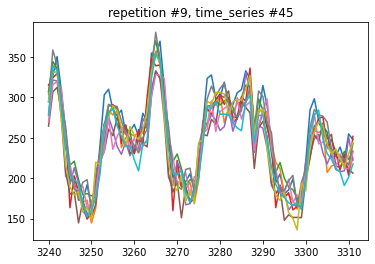

In [12]:
# plot mean of only one time series
rep_no = 1
for rep_no in range(10):
    plt.title(f'repetition #{rep_no}, time_series #{ts_number}')
    ts_list1[rep_no]['mean'].plot()
    # plt.xlim(20600,20700)

## plot the kde for experiments

for each datapoint in data_n, it plots kde of different repetition. number of repetition is 'max_shape'

In [13]:
data_n = [0, 120, 230]
max_shape = 4 # number of experiments that are going to be plotted
plot_kde_hist(data_n, max_shape, sorted_forcast_list1)

LinAlgError: singular matrix

## std of mean and std over time

In [14]:
## calculate the std over different repetitions
forecast_distrib_df1 = get_forcast_distrib(forcast_list1)
# convert the list of dataframes to a 3d np
forecast_np = get_np_forcast(forecast_distrib_df1)
# get std over different experiments
forecast_std_np = get_std_np(forecast_np, forecast_distrib_df1)
df_std_forecast = pd.DataFrame(forecast_std_np)
df_std_forecast.rename(index={0:'mean',1:'sigma'}, inplace=True)

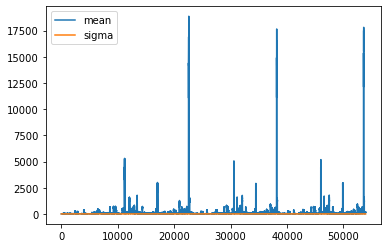

In [15]:
df_std_forecast.T.plot()

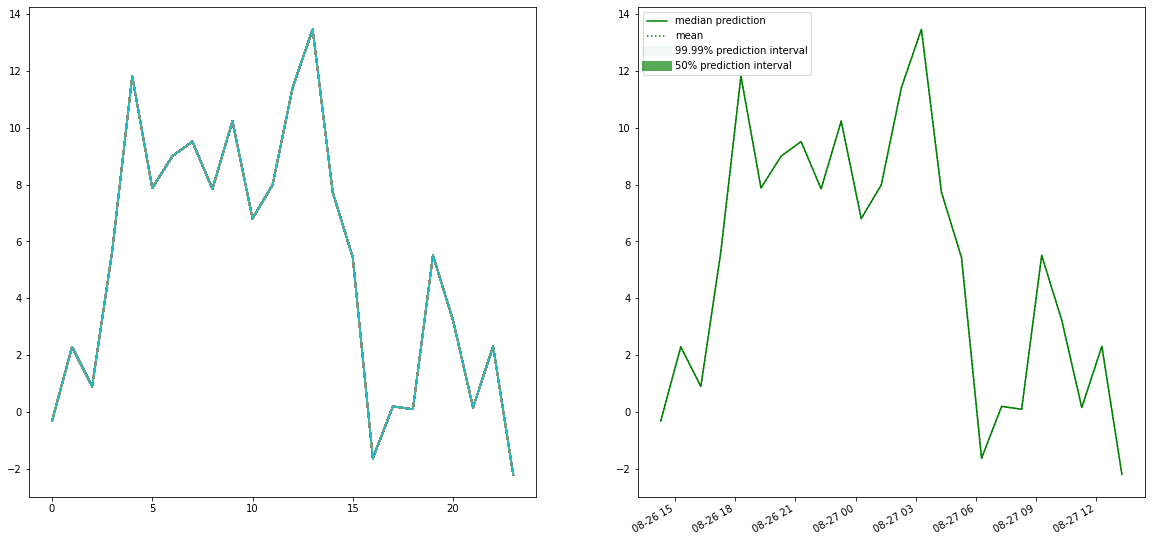

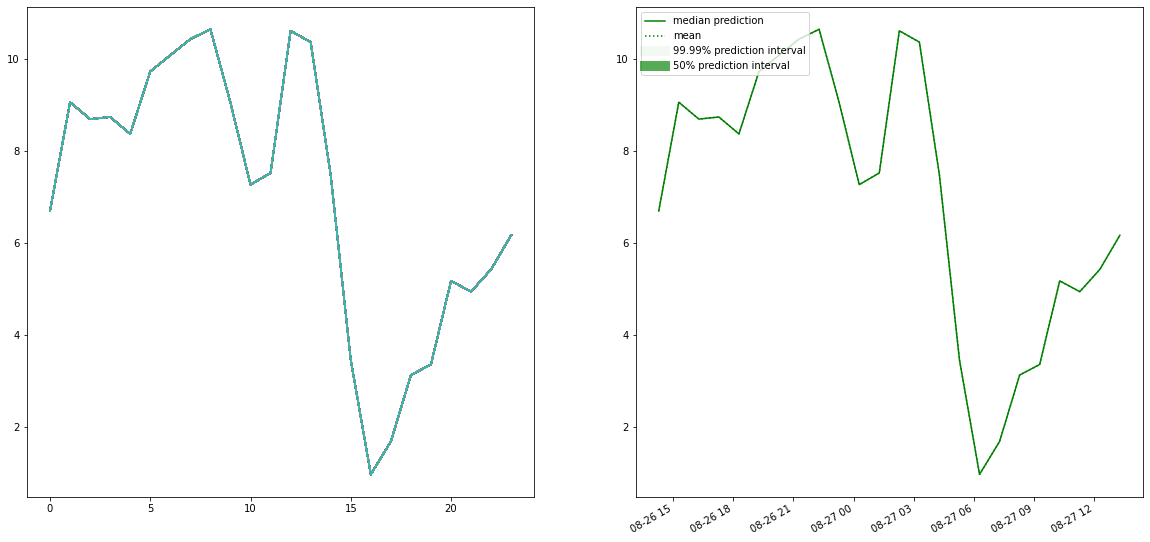

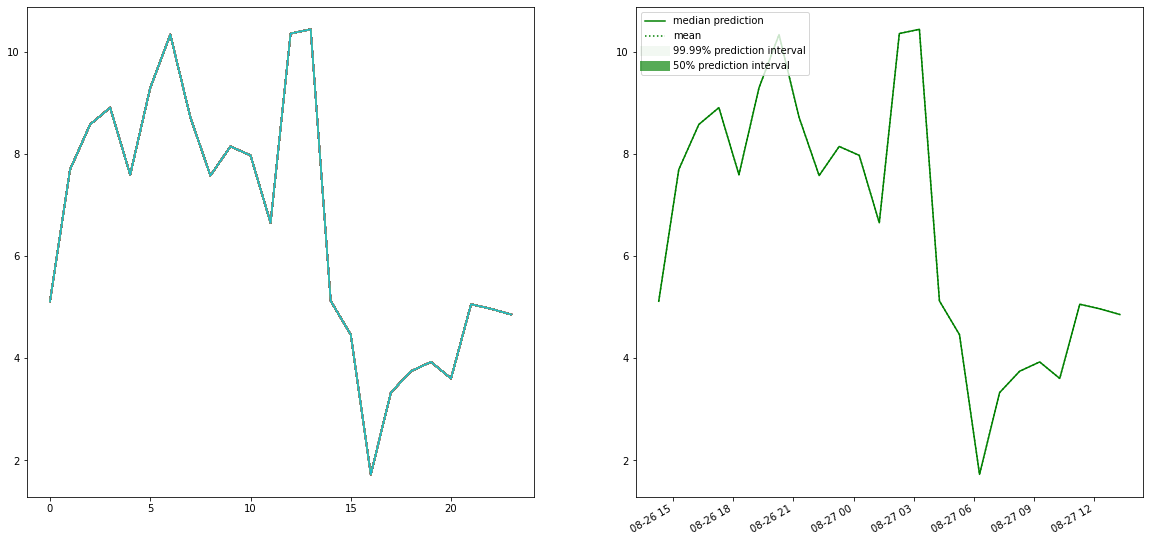

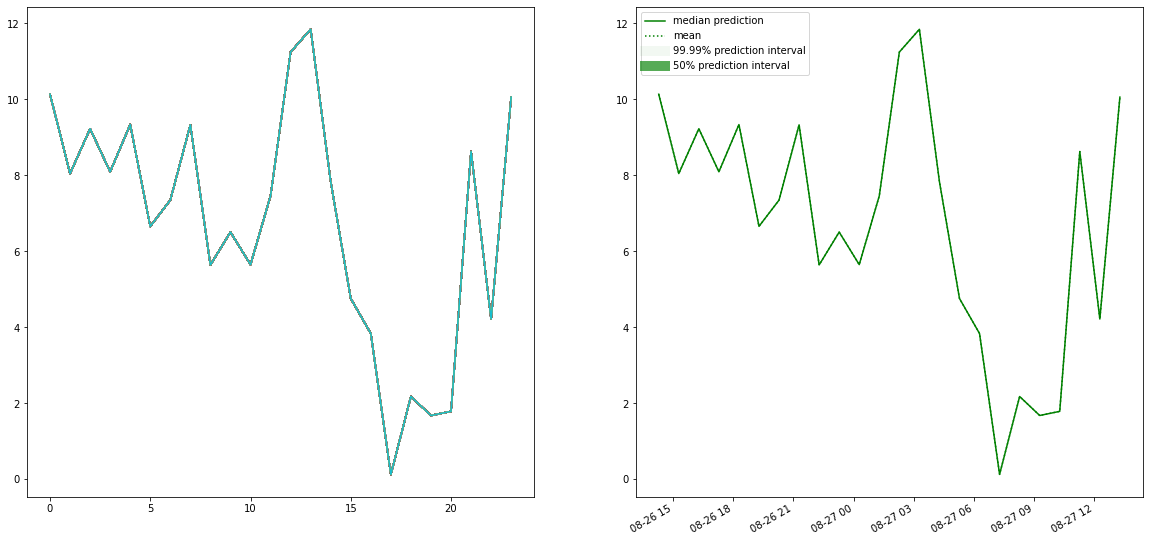

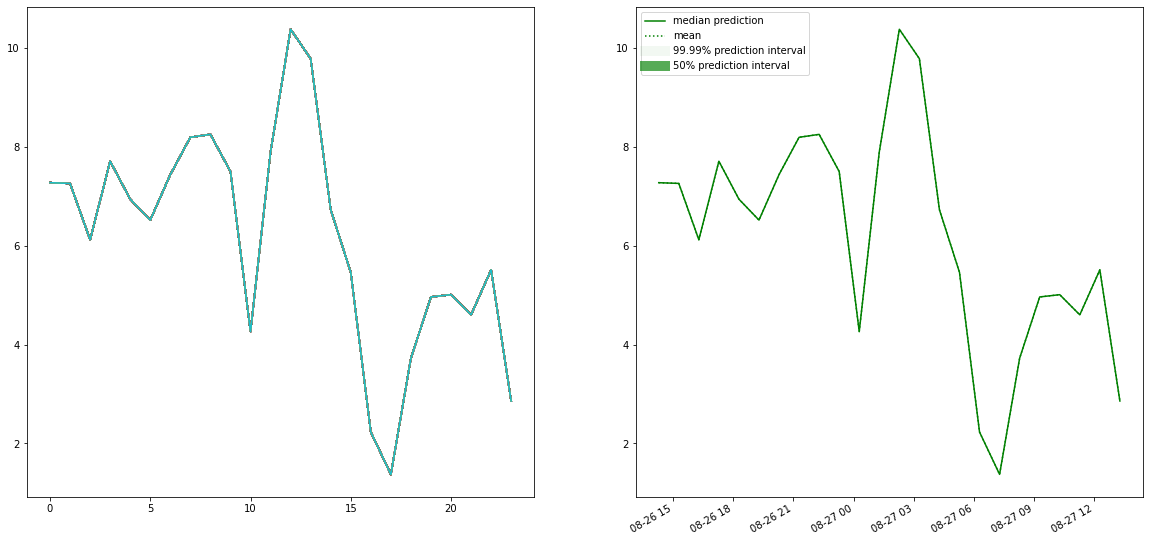

In [17]:
time_point_no = 0
rep_lim = 5
save_plot_exp(sample_forcast_list1, rep_lim, time_point_no)